In [2]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [17]:
import numpy as np
import scipy as sc
from sklearn.mixture import GaussianMixture
from scipy.spatial import Voronoi, voronoi_plot_2d

figsize(8, 8)

def V(*args):
    return np.array(args)

def image_grid(array, ncols=4):
    index, height, width, channels = array.shape
    nrows = index//ncols
    
    img_grid = (array.reshape(nrows, ncols, height, width, channels)
              .swapaxes(1,2)
              .reshape(height*nrows, width*ncols))
    
    return img_grid

from torchvision import datasets, transforms
from sklearn.mixture import GaussianMixture

In [18]:
mnist = list(datasets.MNIST('data', train=True, download=True))
xs, ys = zip(*mnist)
xs = np.array([transforms.ToTensor()(x).numpy().reshape(28*28) for x in xs])

(60000, 784)


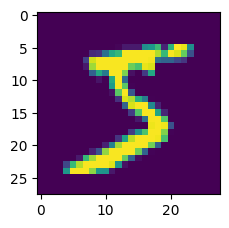

In [20]:
subplot(133)
imshow(xs[0].reshape(28, 28))
print(xs.shape)

# k-Means Clustering

In [6]:
from sklearn.cluster import KMeans
import numpy as np
nclusters = 100
nc = 6
nr = 8
kmeans = KMeans(n_clusters=nclusters, random_state=0).fit(xs)

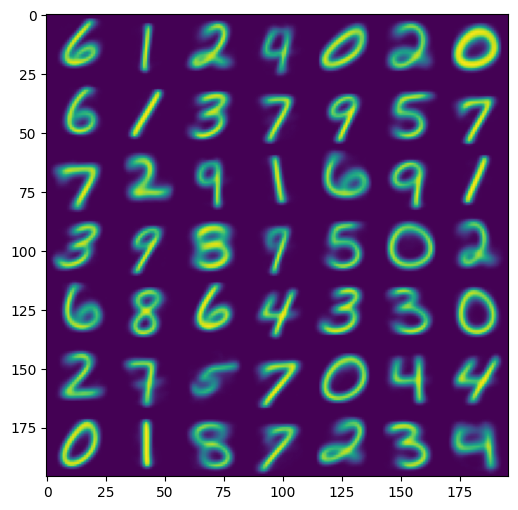

In [24]:
images = np.array(kmeans.cluster_centers_[:49]).reshape(49, 28, 28, 1)
result = image_grid(images, ncols=7)
fig = plt.figure(figsize=(6, 6))
plt.imshow(result)

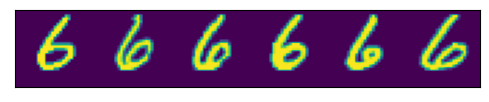

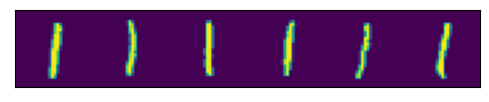

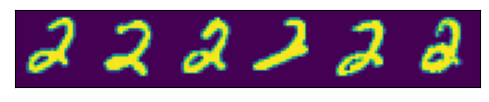

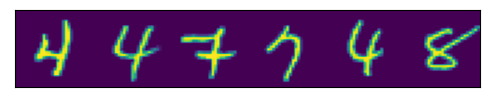

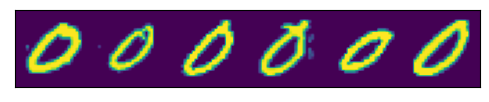

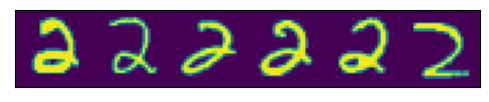

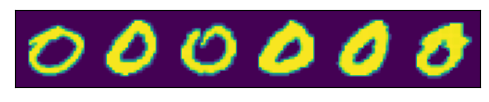

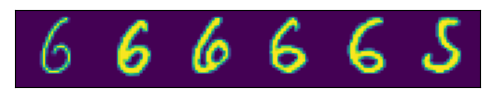

In [23]:

kmeans.labels_
clusters = [[] for _ in range(nclusters)]
for i, l in enumerate(kmeans.labels_):
    clusters[l].append(xs[i])
for c in range(nr):
    images = np.array(clusters[c])[:nc].reshape(nc, 28, 28, 1)
    result = image_grid(images, ncols=nc)
    fig = plt.figure(figsize=(6, 6))
    xticks([]); yticks([])
    plt.imshow(result)

# Gaussian Mixture Models, Spherical Covariance

In [9]:
nclusters = 100
gm = GaussianMixture(n_components=nclusters, random_state=0, covariance_type='spherical').fit(xs)

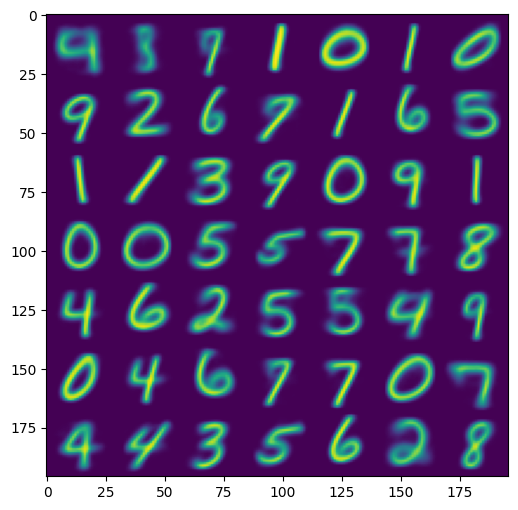

In [25]:
images = np.array(gm.means_[:49]).reshape(49, 28, 28, 1)
result = image_grid(images, ncols=7)
fig = plt.figure(figsize=(6, 6))
plt.imshow(result)

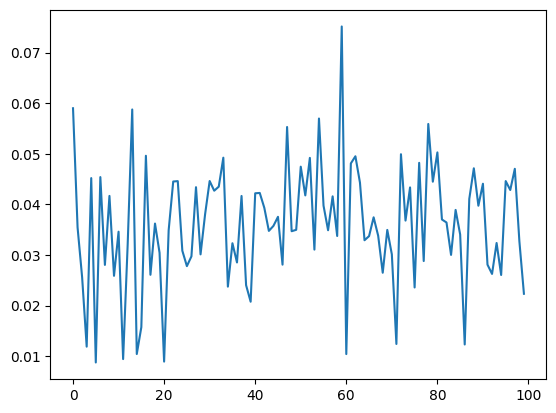

In [11]:
plot(gm.covariances_)

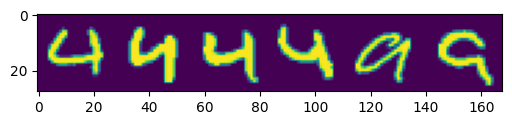

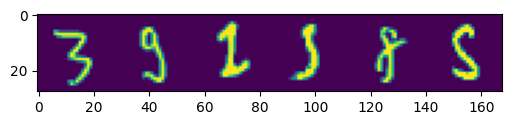

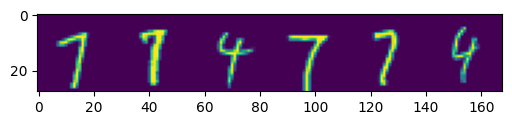

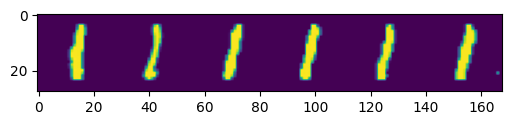

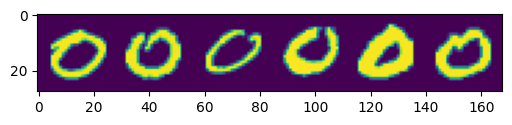

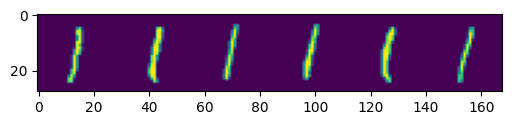

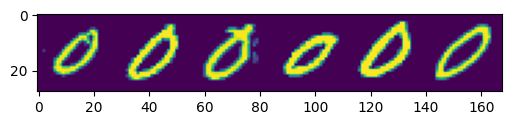

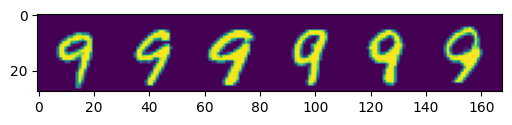

In [26]:
labels = gm.predict(xs)
clusters = [[] for _ in range(nclusters)]
for i, l in enumerate(labels):
    clusters[l].append(xs[i])
for c in range(nr):
    images = np.array(clusters[c])[:nc].reshape(nc, 28, 28, 1)
    result = image_grid(images, ncols=nc)
    fig = plt.figure(figsize=(6, 6))
    plt.imshow(result)

# Gaussian Mixture Model, Diagonal Covariance Matrices

In [13]:
nclusters = 100
gmd = GaussianMixture(n_components=nclusters, random_state=0, covariance_type='diag').fit(xs)
gmd.means_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

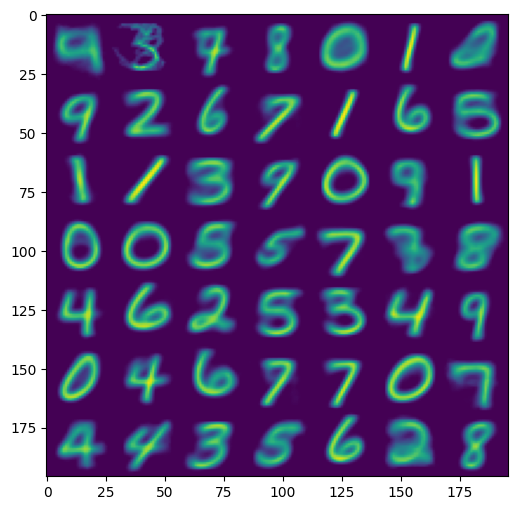

In [27]:
images = np.array(gmd.means_[:49]).reshape(49, 28, 28, 1)
result = image_grid(images, ncols=7)
fig = plt.figure(figsize=(6, 6))
plt.imshow(result)

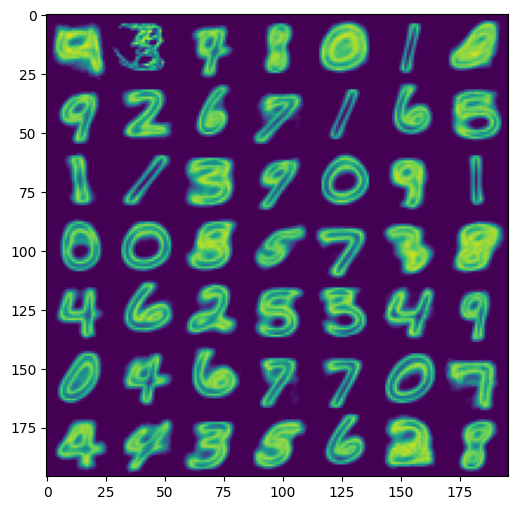

In [28]:
images = np.array(gmd.covariances_[:49]).reshape(49, 28, 28, 1)
result = image_grid(images, ncols=7)
fig = plt.figure(figsize=(6, 6))
plt.imshow(result)

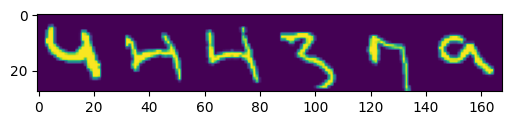

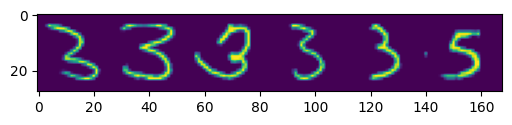

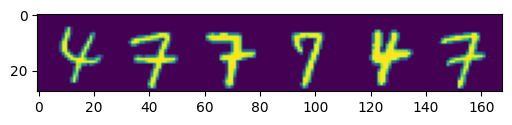

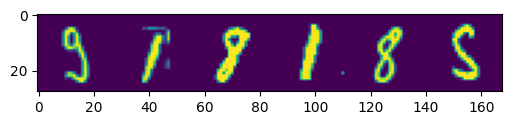

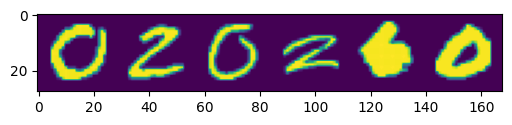

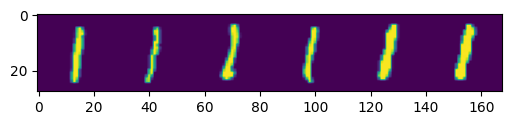

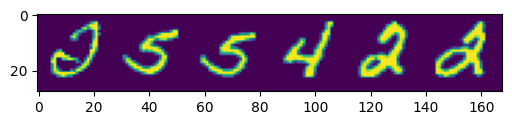

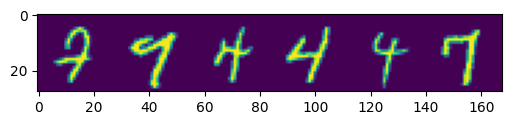

In [29]:
labels = gmd.predict(xs)
clusters = [[] for _ in range(nclusters)]
for i, l in enumerate(labels):
    clusters[l].append(xs[i])

for c in range(nr):
    images = np.array(clusters[c])[:nc]
    if len(images) < nc:
        continue
    images = images.reshape(nc, 28, 28, 1)
    result = image_grid(images, ncols=nc)
    fig = plt.figure(figsize=(6, 6))
    plt.imshow(result)